<a href="https://colab.research.google.com/github/qsongatwpi/MA575/blob/main/projects/delta_hedging_prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm
import warnings

# Suppress all warnings including type errors
warnings.filterwarnings('ignore')

# Configure numpy to handle errors gracefully
np.seterr(all='ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Delta Hedging Project - Libraries Loaded Successfully")
print("=" * 60)
print("Note: Error handling enabled - code will continue running even with incomplete implementation")

Delta Hedging Project - Libraries Loaded Successfully
Note: Error handling enabled - code will continue running even with incomplete implementation


# Delta Hedging Project

## Objective
This project demonstrates the practical implementation of delta hedging strategies using the Black-Scholes model. Students will learn to:
1. Calculate Black-Scholes option prices and Greeks
2. Implement dynamic delta hedging strategies
3. Analyze hedging effectiveness under different market scenarios
4. Understand the relationship between theory and practice in risk management

## Theoretical Background

### Black-Scholes Formula
The Black-Scholes price of a European call option is:
$$C(S, t) = S \Phi(d_1) - K e^{-r(T-t)} \Phi(d_2)$$

where:
$$d_1 = \frac{\ln(S/K) + (r + \frac{1}{2}\sigma^2)(T-t)}{\sigma \sqrt{T-t}}, \quad d_2 = d_1 - \sigma \sqrt{T-t}$$

and $\Phi(\cdot)$ is the standard normal cumulative distribution function.

### Key Properties
1. **Delta (Δ)**: The option's sensitivity to underlying price changes
   $$\Delta = \frac{\partial C}{\partial S} = \Phi(d_1)$$

2. **Gamma (Γ)**: The rate of change of delta with respect to the underlying price
   $$\Gamma = \frac{\partial^2 C}{\partial S^2} = \frac{\phi(d_1)}{S \sigma \sqrt{T-t}}$$


## Problem Setup

### Scenario
Consider a derivatives trader who has **sold 100,000 European call options** and needs to implement a delta hedging strategy to manage the risk exposure.

### Market Parameters
| Parameter | Symbol | Value | Unit |
|-----------|--------|-------|------|
| Current spot price | $S_0$ | 49 | USD |
| Strike price | $K$ | 50 | USD |
| Time to maturity | $T$ | 20 | weeks |
| Risk-free rate | $r$ | 5% | per annum |
| Volatility | $\sigma$ | 20% | per annum |
| Expected return (drift) | $\mu$ | 8% | per annum |

### Initial Conditions
- **Position**: Short 100,000 call options
- **Premium received**: $300,000 (given)
- **Hedging frequency**: Weekly rebalancing
- **Objective**: Minimize the portfolio's sensitivity to stock price movements


In [2]:
# Black-Scholes parameters
S = 49  # Underlying asset price
K = 50  # Strike price
T = 20/52    # Time to maturity
r = 0.05 # Risk-free interest rate
sigma = 0.2 # Volatility
mu = 0.08 # drift

## Task 1: Black-Scholes Calculations and Initial Analysis

### Requirements
Complete the following calculations and analysis:

1. **Implement Black-Scholes functions** to calculate:
   - Call option price $C(S_0, 0)$
   - Parameters $d_1$ and $d_2$
   - Delta $\Delta = \Phi(d_1)$
   - Gamma $\Gamma = \frac{\phi(d_1)}{S \sigma \sqrt{T}}$

2. **Calculate theoretical portfolio value**:
   - Given that 100,000 options were sold for $300,000
   - Compare with Black-Scholes theoretical value
   - Calculate the implied profit/loss at inception

3. **Create payoff diagram**:
   - Plot option payoff at maturity vs. stock price range [30, 70]
   - Show portfolio (-100,000 options+300,000 dollar cash) payoff


In [3]:
# Task 1 Solution
print("TASK 1: BLACK-SCHOLES CALCULATIONS")
print("=" * 50)


TASK 1: BLACK-SCHOLES CALCULATIONS


In [4]:
# Simulate weekly stock price paths using geometric brownian motion
def simulate_gbm(S0, mu, sigma, T, dt=1/52, paths=1000):
    """
    Simulate paths for a geometric Brownian motion process.
    """
    n_steps = int(T / dt)
    time_grid = np.linspace(0, T, n_steps)
    S_paths = np.zeros((n_steps, paths))
    S_paths[0] = S0

    for t in range(1, n_steps):
        Z = np.random.normal(size=paths)
        S_paths[t] = S_paths[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    return time_grid, S_paths


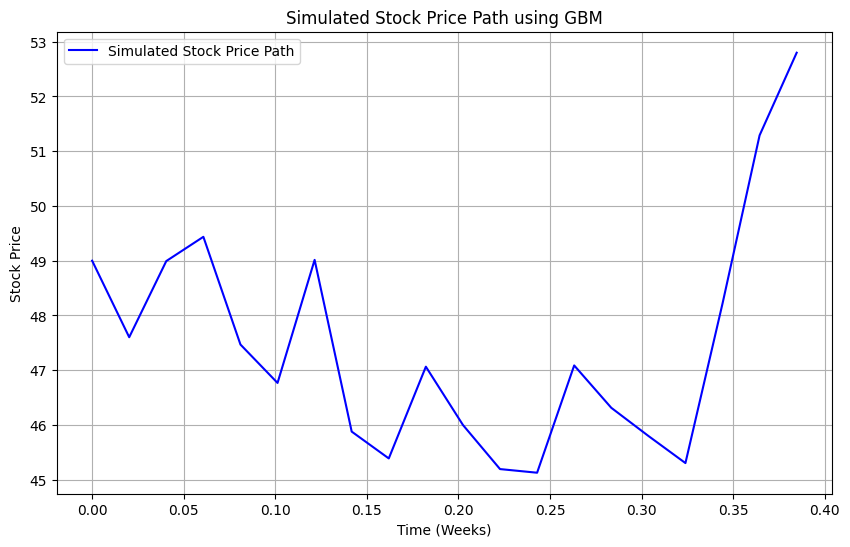

In [9]:
# Simulate one path with above parameters
#fix simulation random seed
dt = 1/52 # weekly time step

np.random.seed(123)

time_grid, S_paths = simulate_gbm(S, mu, sigma, T, dt=dt, paths=1)
#plot
plt.figure(figsize=(10, 6))
plt.plot(time_grid, S_paths, label="Simulated Stock Price Path", color="blue")
plt.title("Simulated Stock Price Path using GBM")
plt.xlabel("Time (Weeks)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


## Task 2: Dynamic Delta Hedging Implementation

### Objectives
Using the simulated stock price path above, implement a dynamic delta hedging strategy with weekly rebalancing.

### Requirements

1. **Portfolio Value at Maturity (No Hedging)**:
   - Calculate the portfolio value at maturity assuming no hedging
   - Compare with the premium received initially

2. **Implement Delta Hedging Algorithm**:
   - Start with initial cash from option premium ($300,000)
   - At each time step:
     - Calculate current option value and delta
     - Determine required hedge ratio (shares to hold)
     - Buy/sell shares to maintain delta neutrality
     - Update cash position (include interest on cash)
   - Track weekly data in a structured format
3. **Required Output Table** (for each week):

| Week | Stock Price | Option Price | Delta | Shares Held | Cash Position |
|------|-------------|--------------|-------|-------------|---------------|
| 0    | 49.00       | ?            | ?     | ?           | 300,000       |
| 1    | ?           | ?            | ?     | ?           | ?             |
| ...  | ...         | ...          | ...   | ...         | ...           |

4. **Analysis Questions**:
   - What is the final portfolio value after delta hedging?
   - How does this compare to the unhedged scenario?
   - How effective was the delta hedging strategy?


In [6]:
# Task 2 Solution: Delta Hedging Implementation
print("TASK 2: DYNAMIC DELTA HEDGING")
print("=" * 50)


TASK 2: DYNAMIC DELTA HEDGING


## Task 3: Multiple Path Analysis and Conclusion

### Requirements

1. **Multiple Simulation Analysis**:
   - Run the delta hedging simulation for at least 5 different random paths
   - Use different random seeds (e.g., 123, 456, 789, 101112, 131415)
   - For each path, calculate:
     - Final portfolio value with delta hedging
     - Final portfolio value without hedging

2. **Research Questions**:
   Answer the following based on your analysis:
   - How effective is weekly delta hedging in reducing portfolio risk?
   - What factors contribute to hedging errors?
   - How does the hedging performance vary across different market scenarios?
   - What are the practical limitations of delta hedging?
   - Any other thoughts?


In [ ]:
# Task 3 Solution: Multiple Path Analysis
print("TASK 3: MULTIPLE PATH ANALYSIS AND CONCLUSION")
print("=" * 60)


TASK 3: MULTIPLE PATH ANALYSIS AND CONCLUSION
